In [5]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pathlib

In [8]:
os.chdir('..')
path = pathlib.Path().resolve()

<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Swimming Pool Dataset in the AssignmentData folder
    
* <span style='font-family:Georgia'> Display the first few rows of the dataset.
 
</div>

In [19]:
pools = gpd.read_file(f'{path}/data/AssignmentData/swimming_pools.shp')
pools.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


# 1. Buffer Analysis


    
* <span style='font-family:Georgia'> Plot the swimming pools data with Geopandas. 
 
</div>

<AxesSubplot: >

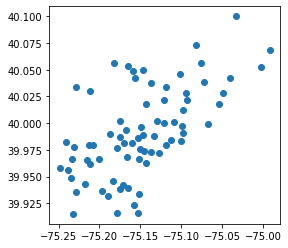

In [20]:
pools.plot()

* <span style='font-family:Georgia'> Find the the swimming pool with the following name "Jardel Pool". 
 
</div>

In [21]:
jardel_pool = pools[pools.NAME == 'Jardel Pool']

In [22]:
jardel_pool

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)


* <span style='font-family:Georgia'> Buffer the Jardel Pool with a distance of your choice. 
 
</div>

In [23]:
jardel_pool.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# I can first plot buffer with degree distance, to this be more informative I would use however different crs and meters

In [25]:
jardel_pool_buffered = jardel_pool.buffer(1)

/var/folders/2f/c6skwjt96m984f45rzp9_qw40000gn/T/ipykernel_8386/40251653.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jardel_pool_buffered = jardel_pool.buffer(1)





<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point. 
 
</div>


<AxesSubplot: >

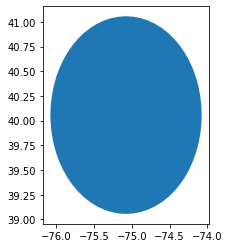

In [26]:
jardel_pool_buffered.plot()

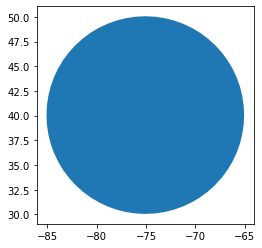

* <span style='font-family:Georgia'> Which number did you choose for the distance?. 
 
</div>

One degree

* <span style='font-family:Georgia'> Is it meters, Kilometers, foot or something else? How do you know it? (Hint: Check the CRS)
 
</div>

Degrees

<b>Instructions:</b> 


* <span style='font-family:Georgia'> Can you find out a CRS for Phildelphia that uses Meters/foot as Unit of measurement? (Hint: search in https://epsg.io/)
    
* <span style='font-family:Georgia'> If you manage to find out a CRS that has meter as unit of measure, set the CRS of the swimming pool to the meter/foot based CRS. I am setting here a meter based units. You can use to_crs() 
 
</div>

In [28]:
pools_meters = pools.to_crs(epsg=3651)

    
* <span style='font-family:Georgia'> Check if the CRS is changed and meter is the unit of measurement
 
</div>

In [29]:
pools_meters.crs

<Derived Projected CRS: EPSG:3651>
Name: NAD83(NSRS2007) / Pennsylvania South
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

* <span style='font-family:Georgia'> Now, buffer a distance of your choice (meters) on Jardel swimming pool.
 
</div>


In [30]:
jardel_pool_meters = pools_meters[pools_meters.NAME == 'Jardel Pool'].buffer(1000)

In [31]:
jardel_pool_meters

2    POLYGON ((829125.291 83727.797, 829120.476 836...
dtype: geometry


* <span style='font-family:Georgia'> Plot the buffered point.
 
</div>

<AxesSubplot: >

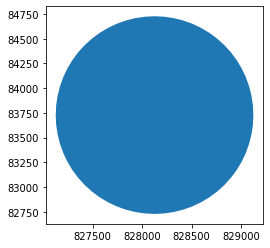

In [32]:
jardel_pool_meters.plot()

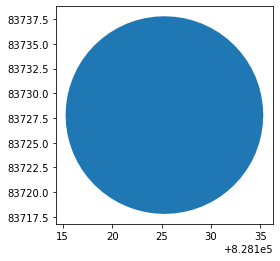

# 2. Spatial Join

<b>Instructions:</b> 
    
* <span style='font-family:Georgia'> Read the cleaned incidents dataset from the previous Excercise 2.7 Assignment.
    
* <span style='font-family:Georgia'> You might copy the shapefile to your current folder or copy the path of the dataset.
    
* <span style='font-family:Georgia'> Display the first few rows of the data. 
    
</div>

In [41]:
incidents = gpd.read_file(f'{path}/outputs/incidents_clean.shp') 
incidents.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)



<b>Instructions:</b> 
    
* <span style='font-family:Georgia'>Read the Neighbourhood data in "AssignmentData/Neighborhoods_Philadelphia/ Folder.
      
* <span style='font-family:Georgia'> Display the first few rows of the data. 
    
</div>

In [43]:
neighbor = gpd.read_file(f'{path}/data/AssignmentData/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp') 

In [45]:
neighbor.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."



    
* <span style='font-family:Georgia'> Check if the incidents data and the neighbourhood data has the same CRS.
 
</div>

In [47]:
incidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
neighbor.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


<b>Alert:</b> They do not have the same CRS, so you need to reproject the incidents data from EPSG:4326 to EPSG:2272.
</div>

In [49]:
incidents = incidents.to_crs(epsg=2272)


<b>Instructions:</b> 
    
* <span style='font-family:Georgia'>Use this code if the points fall the same are as the neighbourhood areas. Change the POLYGON with the neighbourhoods Geodataframe and POINTS with the Incidents GeodataFrame.
      

    
</div>

<AxesSubplot: >

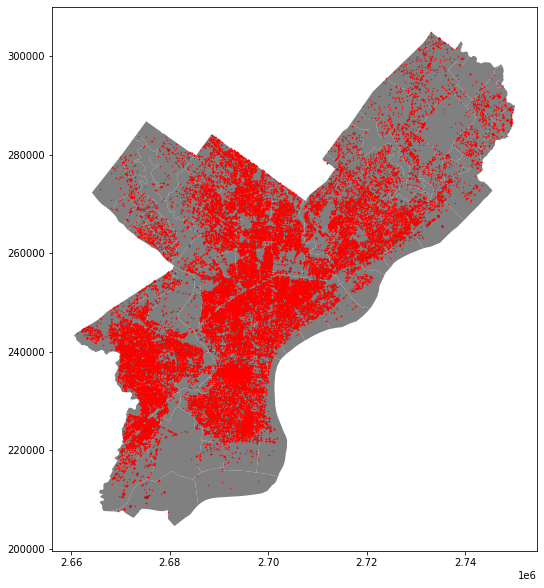

In [50]:
fig, ax = plt.subplots(figsize=(12,10))
neighbor.plot(ax=ax, color="gray")
incidents.plot(ax=ax, markersize=0.2, color="Red")


<b>Instructions:</b> 
    
* <span style='font-family:Georgia'> Use .sjoin() to join points dataset with the Neighbourhod dataset. Note that we want to determine which point is within which polygon.
    
* <span style='font-family:Georgia'>Remember to use the projected points.
      
* <span style='font-family:Georgia'> You might use these parameters: sjoin(point dataset(XXX -change the name), polygon dataset(XXX -change the name), how="inner", op="within"). Call the joined data what ever name you like. 
    
</div>

In [51]:
joined = gpd.sjoin(incidents, neighbor, how='inner', op='within')

/opt/anaconda3/envs/spatial-ds-ws/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [53]:
joined.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,...,point_y,lat,lng,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,...,39.962334,39.962334,-75.161446,POINT (2694008.319 239770.036),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
126,4224,9,3,03/01/2020 13:08,03/01/2020,13:08:00,13,2.020090e+11,2500 BLOCK PENNSYLVANIA AVE,600,...,39.966631,39.966631,-75.178832,POINT (2689091.108 241192.537),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
141,8977,9,3,09/01/2020 19:57,09/01/2020,19:57:00,19,2.020090e+11,2200 BLOCK FAIRMOUNT AVE,600,...,39.967146,39.967146,-75.175316,POINT (2690070.960 241408.843),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
616,39199,9,3,02/01/2020 21:25,02/01/2020,21:25:00,21,2.020090e+11,1900 BLOCK FAIRMOUNT AVE,600,...,39.967010,39.967010,-75.169684,POINT (2691650.359 241405.244),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06
617,39200,9,3,05/01/2020 19:55,05/01/2020,19:55:00,19,2.020090e+11,1900 BLOCK FAIRMOUNT AVE,600,...,39.967010,39.967010,-75.169684,POINT (2691650.359 241405.244),97,SPRING_GARDEN,Spring Garden,Spring Garden,13574.806234,6.775876e+06


  
<b>Challenge: :</b> 
    
* <span style='font-family:Georgia'> Can you count how many incidents are with in each neighbourhood? 
   
* <span style='font-family:Georgia'>  You might use Pandas groupby  using NAME column and then calculate the size. * You will end up with a Series Datatype so you might also covert this to pandas dataframe using to_frame().reset_index.
    
* <span style='font-family:Georgia'>You can also give the your columns names using DF.columns = ["XXX", "YYY"].

    
</div>


In [65]:
def get_incidents_per_area(gdf,name_col):
    grouped = gdf.groupby(name_col)
    grouped = grouped['NAME']
    grouped.columns = ['COUNT']
    return grouped.count()

In [66]:
counts = get_incidents_per_area(gdf=joined, name_col='NAME')

In [82]:
counts = pd.DataFrame(counts)
counts

,NAME
NAME,
ACADEMY_GARDENS,81
AIRPORT,162
ALLEGHENY_WEST,924
ANDORRA,56
ASTON_WOODBRIDGE,74
...,...
WISTER,272
WOODLAND_TERRACE,26
WYNNEFIELD,456



    
* <span style='font-family:Georgia'> How many Incidents are in BREWERYTOWN	 neighbourhood.
 
</div>

In [83]:
counts[counts.index == 'BREWERYTOWN']

,NAME
NAME,
BREWERYTOWN,451



* <span style='font-family:Georgia'> Which Neighbourhood has the lowest Crime incidents? Which Neighbourhood has the highest Crime incidents?

 
</div>

In [88]:
counts[counts.NAME == counts.NAME.min()]

,NAME
NAME,
MECHANICSVILLE,3


In [89]:
counts[counts.NAME == counts.NAME.max()]

,NAME
NAME,
UPPER_KENSINGTON,2228



    
    MECHANICSVILLE Has only 3 incidents which is the lowest crime incidents per Neighbourhood.
    
    
    UPPER_KENSINGTON has the Highest crime incidents in Philly with a record 2225 crime incidents.
</div>



    
* <span style='font-family:Georgia'> Join the grouped count dataframe with the Original Neighbourhoods - the grouped data is Pandas dataframe and the Neighoburhoods are Geodataframe) So you can use a normal pandas merge. 
    
* <span style='font-family:Georgia'> Use XXXX.merge(df, on="NAME", how="outer") --> XXXX is the Geodataframe. 


 
</div>

In [100]:
counts.columns = ['COUNT']
counts = counts.reset_index()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [101]:
counts

,NAME,COUNT
0,ACADEMY_GARDENS,81
1,AIRPORT,162
2,ALLEGHENY_WEST,924
3,ANDORRA,56
4,ASTON_WOODBRIDGE,74
...,...,...
153,WISTER,272
154,WOODLAND_TERRACE,26
155,WYNNEFIELD,456
156,WYNNEFIELD_HEIGHTS,210


In [103]:
neighbor

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."
...,...,...,...,...,...,...
153,PACKER_PARK,Packer Park,Packer Park,21816.017948,2.888897e+07,"POLYGON ((2688281.903 221811.423, 2688786.625 ..."
154,PENNSPORT,Pennsport,Pennsport,11823.233108,6.492473e+06,"POLYGON ((2698530.956 228135.894, 2698201.040 ..."
155,NEWBOLD,Newbold,Newbold,10052.570885,5.876853e+06,"POLYGON ((2692068.040 225421.124, 2691999.284 ..."
156,WEST_PASSYUNK,West Passyunk,West Passyunk,10499.291848,6.494799e+06,"POLYGON ((2690249.664 225781.392, 2689781.764 ..."


In [112]:
neighbor.NAME = neighbor.NAME.astype(str)

In [117]:
counts.NAME = counts.NAME.astype(str)

In [120]:
neig_count = pd.merge(neighbor, counts, on='NAME', how='inner')
neig_count.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry,COUNT
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",142
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",413
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",281
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",134
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",279



    
* <span style='font-family:Georgia'> Check the type of the merged data ( Make sure it is GeoDataFrame)

 
</div>

In [126]:
print(type(neig_count))

<class 'geopandas.geodataframe.GeoDataFrame'>



* <span style='font-family:Georgia'>  Export the merged GeoDataframe as GeoJson, add driver='GeoJSON' in to_file() method. We will use this file Later
 
</div>

In [127]:
neig_count.to_file(f'{path}/outputs/neig_count.geojson', driver='GeoJSON')